The modern game of cricket generates a lot of statistical and user-generated data. This information is used by coaches and performance analysts to design strategies for future games and seek out new talent. In this file, we will analyze an IPL match between **CSK and MI**. Dataset is avaialble [here](https://www.kaggle.com/rajsengo/indian-premier-league-ipl-all-seasons/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
details = pd.read_csv("season_details.csv", index_col=0)

In [3]:
matches = details[details["match_name"] == "MI v CSK"]

In [4]:
matches.shape

(250, 44)

In [5]:
MI = matches[matches["current_innings"] == "MI"]
CSK = matches[matches["current_innings"] == "CSK"]

In [6]:
print(MI.shape)
print(CSK.shape)

(125, 44)
(125, 44)


In [7]:
MI_runs = MI.groupby('over').sum()
MI_runs.reset_index(inplace=True)
CSK_runs = CSK.groupby('over').sum()
CSK_runs.reset_index(inplace=True)

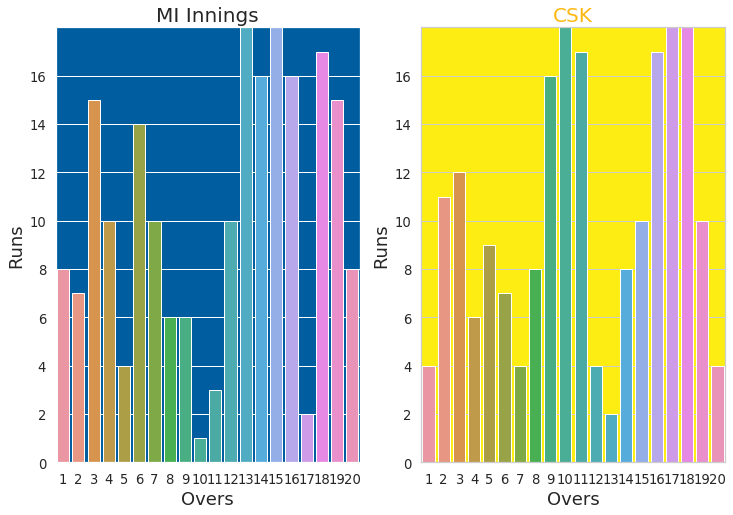

In [8]:
sns.color_palette("Paired")
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
#sns.set(style="whitegrid")
#fig, ax =plt.subplots(1,2,figsize=(12, 8))
f = plt.figure(figsize=(12, 8))
gs = f.add_gridspec(1, 2)
with sns.axes_style("darkgrid"):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 3.5})
    ax = f.add_subplot(gs[0, 0])
    g1 = sns.barplot(x='over', y='runs', data=MI_runs);
    g1.set_facecolor("#005ea0")
    g1.set_yticks(range(0,18,2))
    g1.set_ylim(0,18)
    g1.axes.set_title("MI Innings",fontsize=20)
    g1.set_xlabel("Overs",fontsize=18)
    g1.set_ylabel("Runs",fontsize=18)
    
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    g2 = sns.barplot(x='over', y='runs', data=CSK_runs);
    ax.set_facecolor("#fded13")
    ax.set_title('CSK Innings', color ="#fdb913") 
    g2.set_yticks(range(0,18,2))
    g2.set_ylim(0,18)
    g2.axes.set_title("CSK",fontsize=20)
    g2.set_xlabel("Overs",fontsize=18)
    g2.set_ylabel("Runs",fontsize=18)

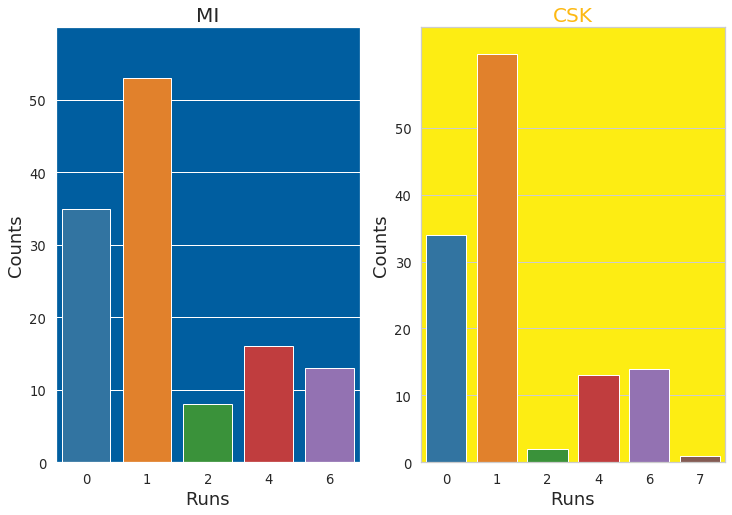

In [9]:
sns.color_palette("Paired")
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
#sns.set(style="whitegrid")
#fig, ax =plt.subplots(1,2,figsize=(12, 8))
f = plt.figure(figsize=(12, 8))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 3.5})
    ax = f.add_subplot(gs[0, 0])
    #g1 = sns.barplot(x='over', y='runs', data=MI_runs);
    g1 = sns.countplot(x="runs",data=MI)
    g1.set_facecolor("#005ea0")
    g1.set_yticks(range(0,60,10))
    g1.set_ylim(0,60)
    g1.axes.set_title("MI",fontsize=20)
    g1.set_xlabel("Runs",fontsize=18)
    g1.set_ylabel("Counts",fontsize=18)    
    
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    g2 = sns.countplot(x="runs",data=CSK)
    ax.set_facecolor("#fded13")
    ax.set_title('CSK', color ="#fdb913") 
    g2.set_yticks(range(0,60,10))
    g2.set_ylim(0,65)
    g2.axes.set_title("CSK",fontsize=20)
    g2.set_xlabel("Runs",fontsize=18)
    g2.set_ylabel("Counts",fontsize=18)
    #g2.set_xticklabels(['Dots', 'Singles','Twos', 'Threes','FOUR','5s','SIX'])

The first two graphs show runs per over and the next two show the types of points scored by each team. 
* The scoring graph (**point types**) and the distribution graph indicate that both rounds had similar scoring types with some small variations.
* However, the bar graph (**Runs per over**) represents a significant contrast between the two runs. **MI** had an initial blast of power-play followed by declining innings, while **CSK** had an unsettling power play and recovered from the end of the power play (after 6 overs) and maintained a pace regular until the end of the match.

Let’s visualize the performance of Batsman vs Bowler using heat maps:

In [10]:
CSK_BATTING = CSK.drop(['text','preText','postText'], axis=1).copy()                           
CSK_BATTING['bowlerToBatsman'] = CSK_BATTING['shortText'].str.split(',').str[0]
CSK_BATTING['bowler'] = CSK_BATTING['bowlerToBatsman'].str.split('to').str[0]
CSK_BATTING['batsman'] = CSK_BATTING['bowlerToBatsman'].str.split('to').str[1]
CSK_BATTING = CSK_BATTING.drop(['shortText'], axis=1)

In [11]:
MI_BATTING = MI.drop(['text','preText','postText'], axis=1).copy()                            
MI_BATTING['bowlerToBatsman'] = MI_BATTING['shortText'].str.split(',').str[0]
MI_BATTING['bowler'] = MI_BATTING['bowlerToBatsman'].str.split('to').str[0]
MI_BATTING['batsman'] = MI_BATTING['bowlerToBatsman'].str.split('to').str[1]
MI_BATTING = MI_BATTING.drop(['shortText'], axis=1)

In [12]:
CSK_HeatMap = pd.pivot_table(CSK_BATTING, index=['bowler'], columns='batsman', values='runs', 
                             aggfunc=np.sum)
MI_HeatMap = pd.pivot_table(MI_BATTING, index=['bowler'], columns='batsman', values='runs', 
                            aggfunc=np.sum)

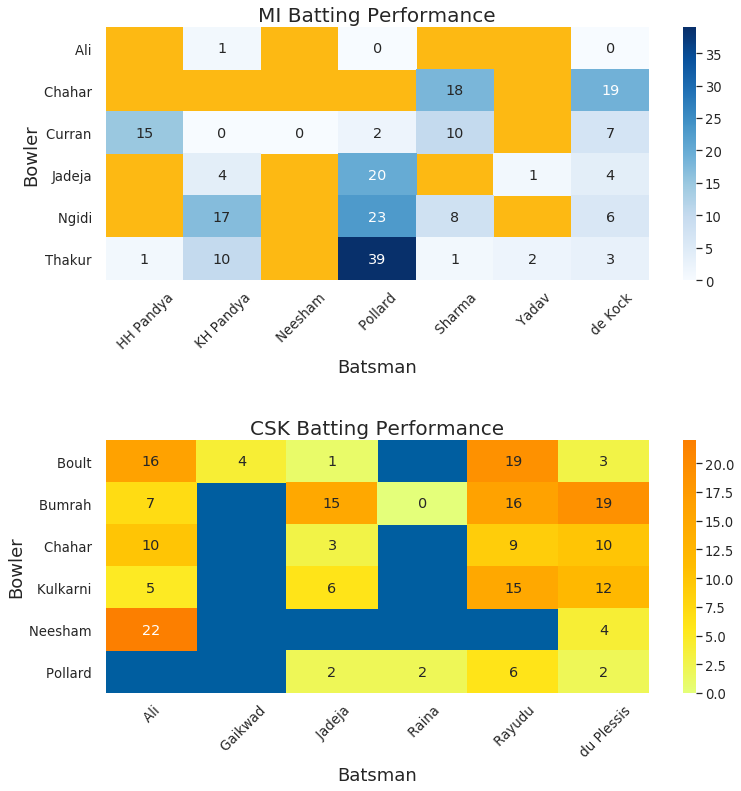

In [13]:
#https://matplotlib.org/tutorials/colors/colormaps.html

f = plt.figure(figsize=(12,12))
gs = f.add_gridspec(2, 1)

with sns.axes_style("darkgrid"):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 3.5})
    ax = f.add_subplot(gs[0, 0])
    #g1 = sns.barplot(x='over', y='runs', data=MI_runs);
    g1 = sns.heatmap(MI_HeatMap, annot=True, fmt="g", cmap='Blues')
    g1.set_facecolor("#fdb913")
    #g1.set_yticks(range(0,60,10))
    #g1.set_ylim(0,60)
    g1.axes.set_title("MI Batting Performance",fontsize=20)
    g1.set_xlabel("Batsman",fontsize=18)
    g1.set_ylabel("Bowler",fontsize=18)        
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
    g1.set_yticklabels(g1.get_yticklabels(), rotation=0)

with sns.axes_style("darkgrid"):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 3.5})
    ax = f.add_subplot(gs[1, 0])
    #g1 = sns.barplot(x='over', y='runs', data=MI_runs);
    g1 = sns.heatmap(CSK_HeatMap, annot=True, fmt="g", cmap='Wistia')
    g1.set_facecolor("#005ea0")
    #g1.set_yticks(range(0,60,10))
    #g1.set_ylim(0,60)
    g1.axes.set_title("CSK Batting Performance",fontsize=20)
    g1.set_xlabel("Batsman",fontsize=18)
    g1.set_ylabel("Bowler",fontsize=18)     
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
    g1.set_yticklabels(g1.get_yticklabels(), rotation=0)
    
f.tight_layout(pad=3.0)

Finally, let’s take a look at the **word cloud** representation of user comments displayed on the [http://www.espncricinfo.com](https://www.espncricinfo.com/) dashboard during the game. It sums up the game well and echoes the performance and feelings of the audience quite a bit:

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(str(bowlertobat) for bowlertobat in CSK["postText"])
text = text.join(str(bowlertobat) for bowlertobat in CSK["preText"])

stopwords = set(STOPWORDS)
stopwords.update(["nan","see","us","br","till","felt", "hit","now","came", "match","back","one" "the","pick","end","sure","got","ball","still","overall","need","will","player","day","thing"])

#print(text)
# Create and generate a word cloud image:
wordcloud_csk = WordCloud(collocations=False,stopwords=stopwords,max_font_size=80, max_words=100,
                          background_color="yellow").generate(text)

In [15]:
text = " ".join(str(bowlertobat) for bowlertobat in MI["postText"])
stopwords = set(STOPWORDS)
stopwords.update(["nan","see","us","br","till","overs","felt", "hit","now","came","blank","match","back","one" "the","pick","end","sure","got","ball","still","overall","need","will","player","day","thing"])

#print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False,stopwords=stopwords,max_font_size=80, max_words=100, 
                      background_color="#6098bf").generate(text)

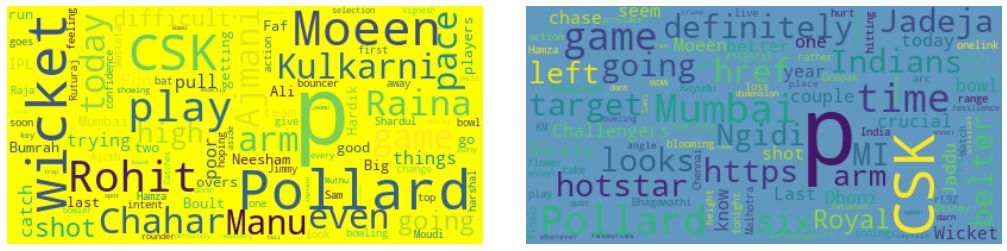

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
#fig.suptitle('Horizontally stacked subplots')
ax1.imshow(wordcloud_csk, interpolation='bilinear')
ax1.axis("off")
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")
fig.tight_layout(pad=3.0)